In [1]:

# General imports
from collections import Counter
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import requests
import urllib
import cv2
import re
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import requests, os
from os import path
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import os
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG19
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
def show_image(url):
    image = io.imread(url)
    plt.imshow(image)
    plt.show()

In [3]:
image_array = np.load('../input/product-250-amazon/image_array_250.npy')
label_array = np.load('../input/product-250-amazon/label_array_250.npy')

In [4]:
image_array.shape

(4998, 224, 224, 3)

In [5]:
train_images, val_images, train_labels, val_labels=train_test_split(image_array, label_array,
                                                                      test_size=0.3, random_state=42)
val_images,test_images, val_labels, test_labels=train_test_split(val_images, val_labels,
                                                                      test_size=0.33, random_state=42)

# Normalize pixel values to be between 0 and 1
train_images, test_images, val_images = train_images / 255, test_images / 255,val_images / 255

print('Number of   training samples : {}'.format(train_images.shape[0]))
print('Number of validation samples : {}'.format(val_images.shape[0]))
print('Number of       test samples : {}'.format(test_images.shape[0]))

Number of   training samples : 3498
Number of validation samples : 1005
Number of       test samples : 495


In [6]:
'''
VGG16 bao gồm 16 layer: 13 layer Conv (2 layer conv-conv, 3 layer conv-conv-conv) đều có kernel 3x3, 
sau mỗi layer conv là maxpooling downsize xuống 0.5, và 3 layer fully connection. VGG16 tương tự như VGG16 
nhưng có thêm 3 layer conv ở cuối 
'''

'\nVGG16 bao gồm 16 layer: 13 layer Conv (2 layer conv-conv, 3 layer conv-conv-conv) đều có kernel 3x3, \nsau mỗi layer conv là maxpooling downsize xuống 0.5, và 3 layer fully connection. VGG16 tương tự như VGG16 \nnhưng có thêm 3 layer conv ở cuối \n'

In [7]:
model = Sequential(name = 'VGG16_by_Hoang')

model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'softmax'))

model.compile(optimizer=Adam(lr = 0.00001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
model.summary()

2022-10-04 07:46:04.864874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 07:46:04.973918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 07:46:04.974991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 07:46:04.976577: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "VGG16_by_Hoang"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)  

In [8]:
train_images.shape

(3498, 224, 224, 3)

In [9]:
train_labels.shape

(3498,)

In [10]:
epoch = 50

In [11]:
history = model.fit(train_images, train_labels, batch_size = 16, epochs=epoch, validation_data=(val_images, val_labels), verbose = 1)


2022-10-04 07:46:10.532774: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2106187776 exceeds 10% of free system memory.
2022-10-04 07:46:13.594936: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2106187776 exceeds 10% of free system memory.
2022-10-04 07:46:15.437253: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-04 07:46:17.700283: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


219/219 [==============================] - ETA: 0s - loss: 4.2981 - accuracy: 0.0686

2022-10-04 07:46:56.973932: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 605122560 exceeds 10% of free system memory.
2022-10-04 07:46:57.984237: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 605122560 exceeds 10% of free system memory.


219/219 [==============================] - 47s 167ms/step - loss: 4.2981 - accuracy: 0.0686 - val_loss: 3.2136 - val_accuracy: 0.0547
Epoch 2/50
219/219 [==============================] - 31s 142ms/step - loss: 3.2256 - accuracy: 0.1261 - val_loss: 3.0215 - val_accuracy: 0.0706
Epoch 3/50
219/219 [==============================] - 31s 142ms/step - loss: 2.8692 - accuracy: 0.1758 - val_loss: 2.6854 - val_accuracy: 0.2109
Epoch 4/50
219/219 [==============================] - 31s 142ms/step - loss: 2.7406 - accuracy: 0.2075 - val_loss: 2.5957 - val_accuracy: 0.2418
Epoch 5/50
219/219 [==============================] - 31s 142ms/step - loss: 2.5646 - accuracy: 0.2413 - val_loss: 2.4871 - val_accuracy: 0.2746
Epoch 6/50
219/219 [==============================] - 31s 142ms/step - loss: 2.4465 - accuracy: 0.2716 - val_loss: 2.4739 - val_accuracy: 0.2716
Epoch 7/50
219/219 [==============================] - 31s 142ms/step - loss: 2.3403 - accuracy: 0.3036 - val_loss: 2.4667 - val_accuracy: 0.2

In [12]:
print("Loss of the model is - " , model.evaluate(test_images, test_labels)[0])
print("Accuracy of the model is - " , model.evaluate(test_images, test_labels)[1]*100 , "%")

2022-10-04 08:12:28.264000: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 298045440 exceeds 10% of free system memory.


16/16 [==============================] - 6s 171ms/step - loss: 3.3332 - accuracy: 0.3717
Loss of the model is -  3.333242893218994
16/16 [==============================] - 1s 72ms/step - loss: 3.3332 - accuracy: 0.3717
Accuracy of the model is -  37.17171847820282 %


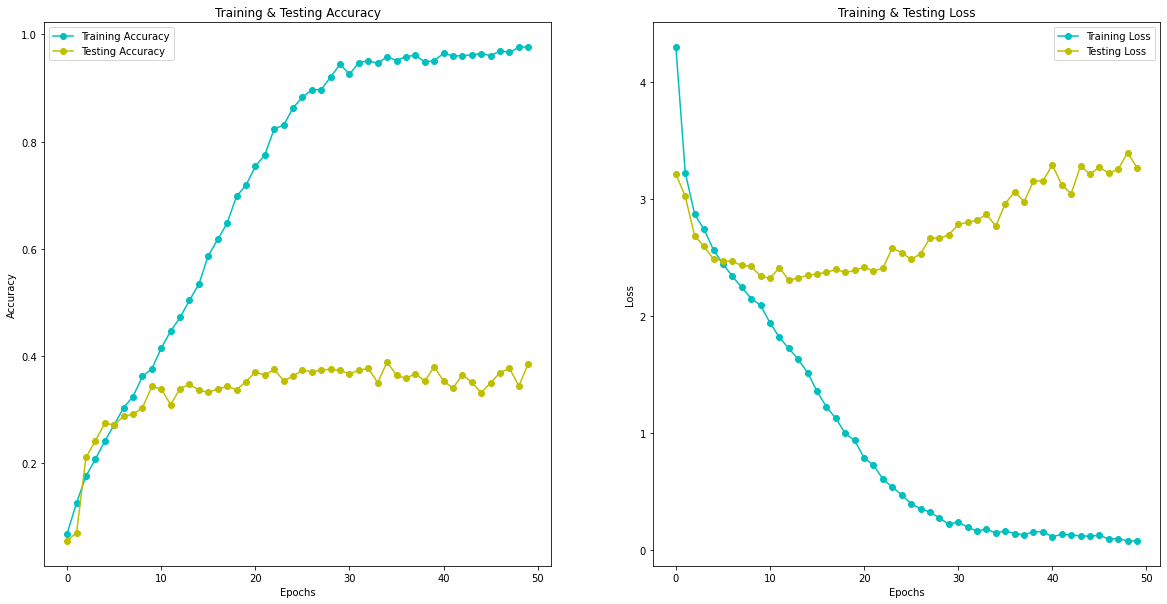

In [13]:
epochs = [i for i in range(epoch)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'co-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'c-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [14]:
model.save('vgg16.h5')